# Proyek Analisis Data: day.csv (Bike Sharing Dataset)
- **Nama:** [Sayyid Muhammad Hanif]
- **Email:** [sayyidhanif3010@gmail.com]
- **ID Dicoding:** [sayyidhanif3010]

## Menentukan Pertanyaan Bisnis

Pertanyaan 1 :

Bagaimana tren peminjaman sepeda dalam beberapa parameter,
*   Hari
*   Bulan
*   Tahun
*   Hari Libur/Kerja
*   Musim
*   Cuaca

Bagaimana faktor suhu, kelembaban, kecepatan angin memengaruhi banyak peminjaman?




Pertanyaan 2 :   
Apakah terdapat perbedaan pola peminjaman antara pengguna casual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


## **Data Wrangling**

### **Gathering Data**

Dataset yang digunakan ialah day.csv dari Bike Sharing Dataset


### Inisialisasi Data

In [151]:
day_df = pd.read_csv("day.csv")
day_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### **Assessing Data**

### Menilai tabel
```
day_df
```



Pada tahap ini, kita memeriksa data dari abnormal seperti missing values, duplicates, atau outlier menggunakan info, describe, dan IQR method

In [152]:
# Menampilkan info dataset
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None



Kita dapat mendeteksi tipe yang keliru pada data yaitu dteday. Dimana tipe data yang seharusnya yaitu datetime bukan object

In [153]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [154]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [155]:
day_df.duplicated().sum()

0

Hingga saat ini, belum ada abnormal dari dataset

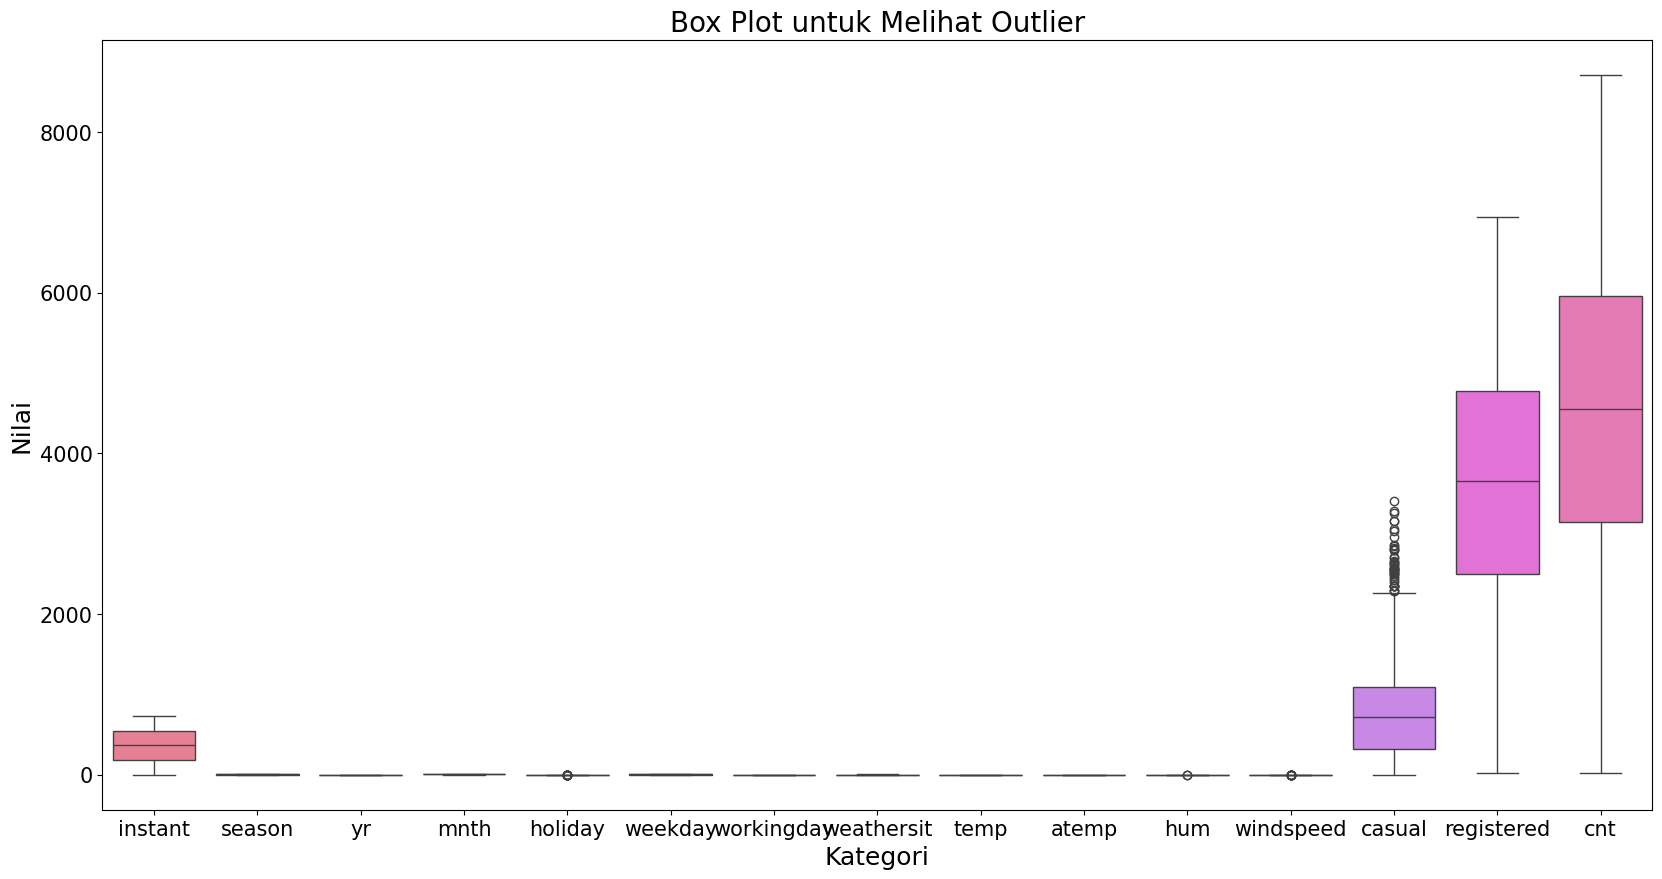

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns


# Membuat box plot
plt.figure(figsize=(20, 10))
sns.boxplot(day_df)

# Menyesuaikan ukuran font pada elemen teks lainnya (opsional)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Menampilkan plot
plt.title('Box Plot untuk Melihat Outlier', fontsize=20)
plt.xlabel('Kategori', fontsize=18)
plt.ylabel('Nilai', fontsize=18)
plt.show()

Kita dapat melihat diatas bahwa terdapat outlier yang signifikan pada kolom 'casual'

### **Cleaning Data**

### Membersihkan Data

```
day_df
```



Pada tahap ini, kita memperbaiki abnormal dari data yang telah ditemukan pada tahap sebelumnya

### Type data baru

In [157]:
# Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [158]:
# Menampilkan info dataset
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Outliers

Selanjutnya kita menghapus outliers menggunakan drop

In [159]:
import pandas as pd

Q1 = (day_df['casual']).quantile(0.25)
Q3 = (day_df['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['casual'] < minimum
kondisi_more_than = day_df['casual'] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

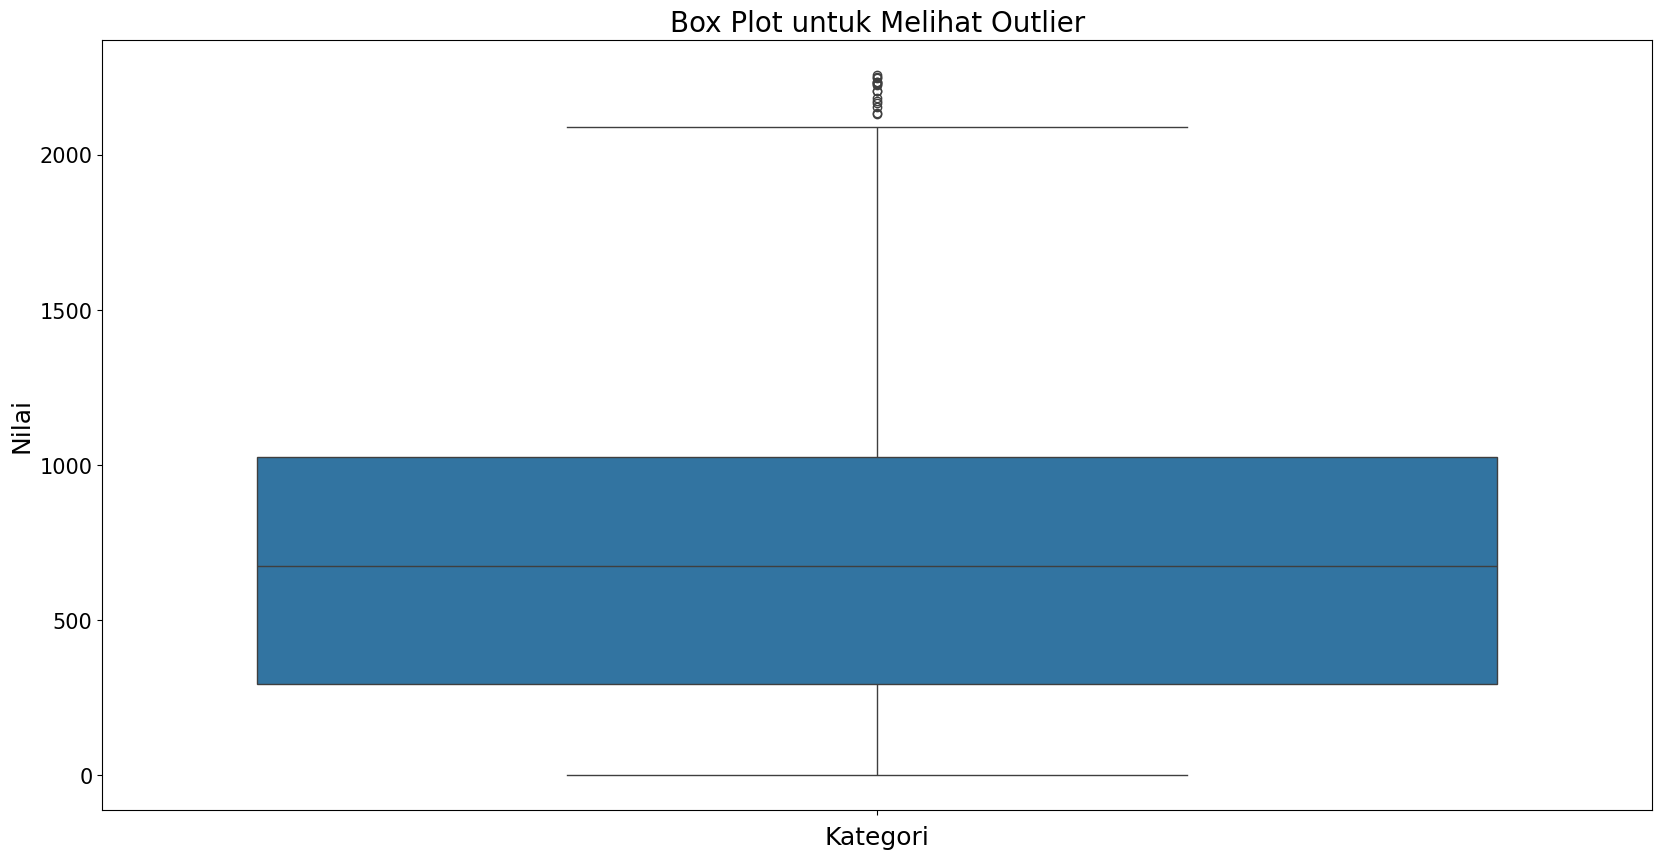

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns


# Membuat box plot
plt.figure(figsize=(20, 10))
sns.boxplot(day_df['casual'])

# Menyesuaikan ukuran font pada elemen teks lainnya (opsional)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Menampilkan plot
plt.title('Box Plot untuk Melihat Outlier', fontsize=20)
plt.xlabel('Kategori', fontsize=18)
plt.ylabel('Nilai', fontsize=18)
plt.show()

Outlier sudah tidak signifikan lagi dan di minimalisir

In [161]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     687 non-null    int64         
 1   dteday      687 non-null    datetime64[ns]
 2   season      687 non-null    int64         
 3   yr          687 non-null    int64         
 4   mnth        687 non-null    int64         
 5   holiday     687 non-null    int64         
 6   weekday     687 non-null    int64         
 7   workingday  687 non-null    int64         
 8   weathersit  687 non-null    int64         
 9   temp        687 non-null    float64       
 10  atemp       687 non-null    float64       
 11  hum         687 non-null    float64       
 12  windspeed   687 non-null    float64       
 13  casual      687 non-null    int64         
 14  registered  687 non-null    int64         
 15  cnt         687 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan mengeksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis dengan menggunakan metode RFM analysis dan Clustering

**RFM Analysis**

Recency (Ketepatan Waktu): Menentukan seberapa baru pelanggan melakukan pembelian atau interaksi.

Frequency (Frekuensi): Mengukur seberapa sering pelanggan melakukan pembelian atau interaksi.

Monetary (Moneter): Menilai total nilai pembelian atau transaksi yang dilakukan oleh pelanggan.

RFM Analysis membantu dalam mengidentifikasi dan mengelompokkan pelanggan ke dalam segmen-segmen tertentu berdasarkan perilaku pembelian mereka.

**Clustering**

Clustering adalah teknik analisis yang digunakan untuk mengelompokkan data menjadi kelompok-kelompok homogen berdasarkan kesamaan karakteristik tertentu.

### Explore `day_df`

In [162]:
day_df.describe(include="all")

<ipython-input-162-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
unique,NaN,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.339156,NaN,2.486172,0.477438,6.512373,0.026201,2.965066,0.726346,1.403202,0.487475,0.467232,0.628917,0.191123,732.010189,3608.756914,4340.767103
std,212.261294,NaN,1.128493,0.499855,3.517065,0.159849,1.932219,0.446158,0.549732,0.184392,0.164292,0.143854,0.078409,521.433756,1580.356697,1866.258997
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,173.500000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.327917,0.326064,0.520000,0.134952,295.000000,2452.500000,3002.000000


Berikut ini adalah beberapa pengelompokan parameter dengan statistik deskriptif

#### RMC Analysis sederhana & Clustering

In [163]:
# Menghitung jumlah dari kolom 'cnt'
total_peminjaman = day_df['cnt'].sum()

print("Total Peminjaman Sepeda:", total_peminjaman)


Total Peminjaman Sepeda: 2982107


Stats banyak peminjaman berdasarkan hari (Minggu- Sabtu)

0 = Minggu, 1 = Senin, ...., 6 = Sabtu

In [164]:
pola_mingguan = day_df.groupby('weekday')['cnt'].sum()
pola_mingguan



weekday
0    339530
1    443417
2    469109
3    465645
4    485395
5    479428
6    299583
Name: cnt, dtype: int64

Stats banyak peminjaman berdasarkan bulan (Jan-Des)

1 = Jan, 2 = Feb, ...., 12 = Des

In [165]:
pola_bulanan = day_df.groupby('mnth')['cnt'].sum()
pola_bulanan

mnth
1     134933
2     151352
3     206487
4     234980
5     277993
6     294054
7     306551
8     336505
9     287303
10    292934
11    247979
12    211036
Name: cnt, dtype: int64

Stats banyak peminjaman berdasarkan tahun (2011-2012)

0 = 2011


1 = 2012

In [166]:
total_tahunan = day_df.groupby('yr')['cnt'].sum()
total_tahunan

yr
0    1211249
1    1770858
Name: cnt, dtype: int64

Stats banyak peminjaman berdasarkan cuaca pada hari tersebut

Ket:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds





In [167]:
day_df.groupby('weathersit')['cnt'].sum()

weathersit
1    2027610
2     916628
3      37869
Name: cnt, dtype: int64

Stats banyak peminjaman berdasarkan hari libur atau hari kerja

0 : Hari kerja

1 : Hari libur

In [168]:
day_df.groupby(['holiday'])['cnt'].sum()

holiday
0    2923161
1      58946
Name: cnt, dtype: int64

Stats banyak peminjaman berdasarkan musim

1 : Semi

2 : Panas

3 : Gugur

4 : Dingin

In [169]:
day_df.groupby(['season'])['cnt'].sum()

season
1    463512
2    778246
3    951468
4    788881
Name: cnt, dtype: int64

Statistik deskriptif dari pengguna casual dan registered

In [170]:
# Statistik deskriptif untuk pengguna casual
statistik_casual = day_df['casual'].describe()

# Statistik deskriptif untuk pengguna terdaftar
statistik_registered = day_df['registered'].describe()


In [171]:
statistik_casual

count     687.000000
mean      732.010189
std       521.433756
min         2.000000
25%       295.000000
50%       674.000000
75%      1026.500000
max      2258.000000
Name: casual, dtype: float64

In [172]:
statistik_registered

count     687.000000
mean     3608.756914
std      1580.356697
min        20.000000
25%      2452.500000
50%      3603.000000
75%      4686.000000
max      6946.000000
Name: registered, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren peminjaman sepeda dalam beberapa parameter,
*   Hari
*   Bulan
*   Tahun
*   Hari Libur/Kerja
*   Musim
*   Cuaca

Bagaimana faktor suhu, kelembaban, kecepatan angin memengaruhi banyak peminjaman?





Berikut ini adalah tabel-tabel histogram berdasarkan parameter yang diteliti

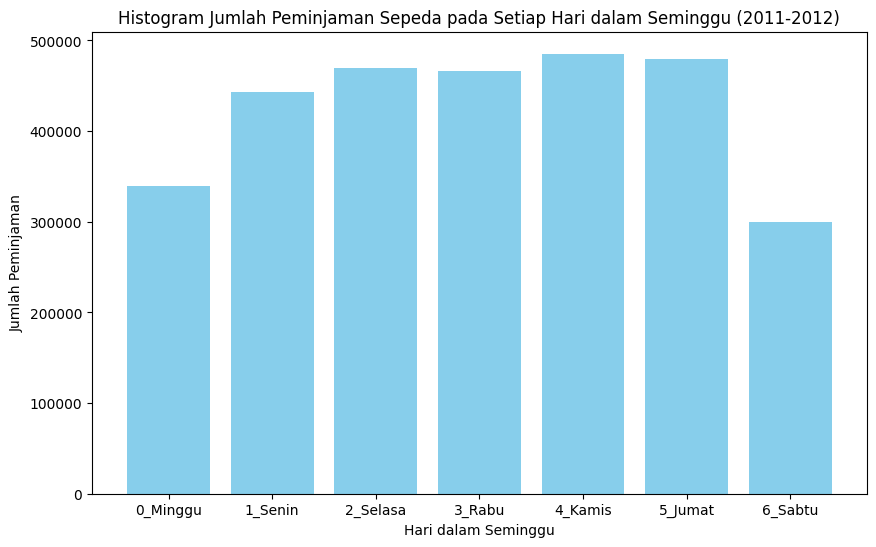

In [173]:
import matplotlib.pyplot as plt

# Data jumlah peminjaman sepeda pada setiap hari dalam seminggu
pola_mingguan = day_df.groupby('weekday')['cnt'].sum()

# Membuat mapping dari angka ke nama hari
mapping_hari = {0: '0_Minggu', 1: '1_Senin', 2: '2_Selasa', 3: '3_Rabu', 4: '4_Kamis', 5: '5_Jumat', 6: '6_Sabtu'}

# Mengganti nama indeks dengan menggunakan mapping
pola_mingguan = pola_mingguan.rename(index=mapping_hari)

# Membuat histogram menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.bar(pola_mingguan.index, pola_mingguan.values, color='skyblue')
plt.title('Histogram Jumlah Peminjaman Sepeda pada Setiap Hari dalam Seminggu (2011-2012)')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.show()



Dari tabel diatas dapat ditarik kesimpulan bahwa peminjaman meningkat saat hari kerja Senin- Jumat

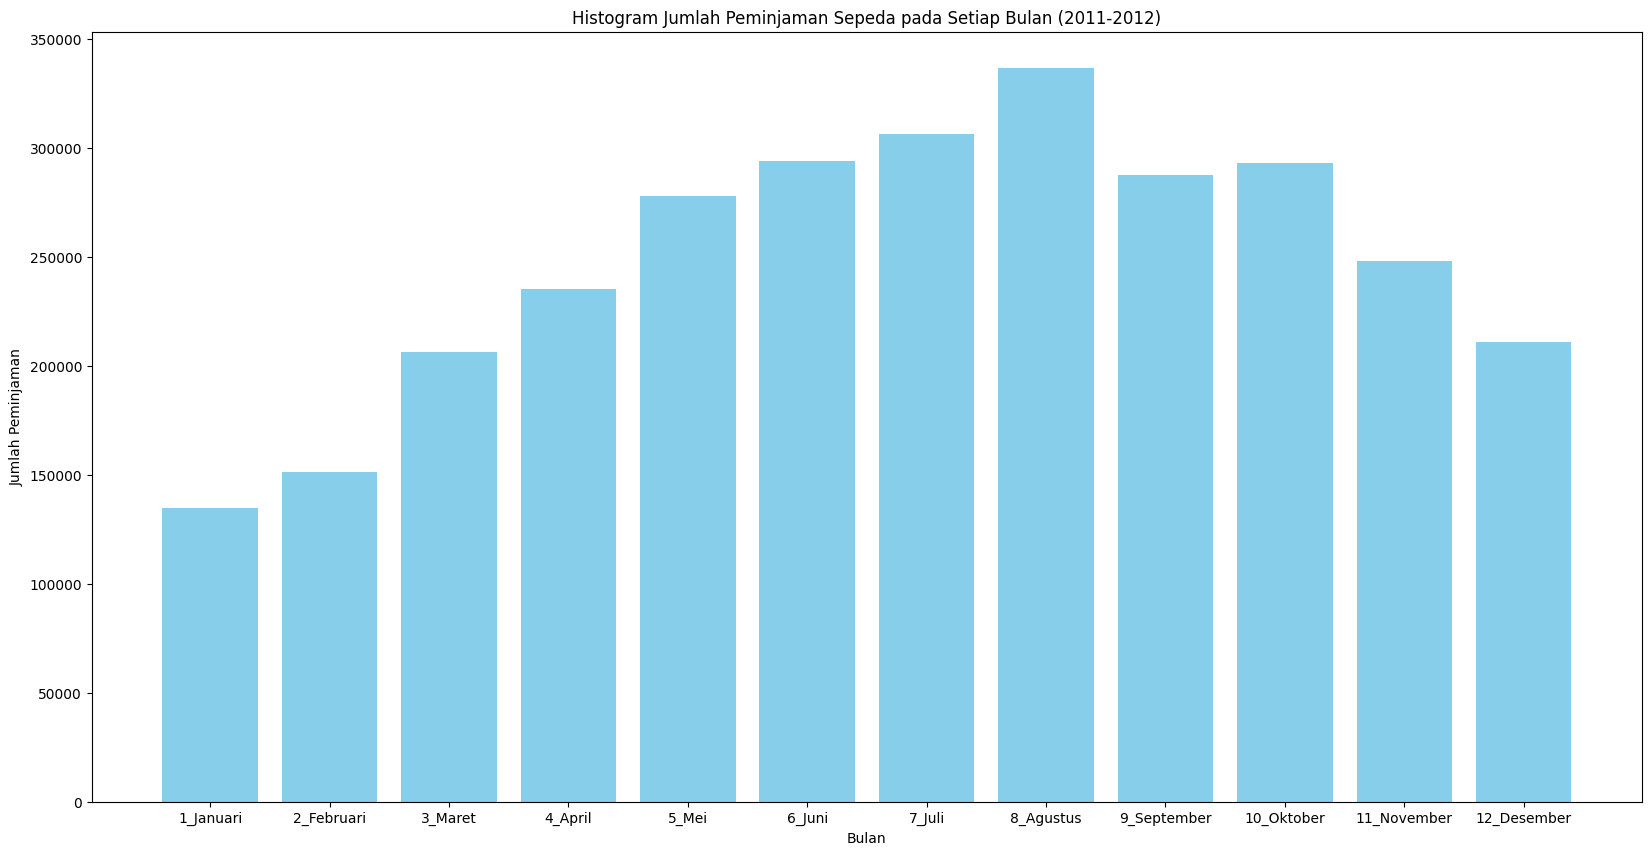

In [174]:
import matplotlib.pyplot as plt

# Data jumlah peminjaman sepeda pada tiap bulan
pola_bulanan = day_df.groupby('mnth')['cnt'].sum()

# Membuat mapping dari angka ke nama bulan
mapping_bulan = {1: '1_Januari', 2: '2_Februari', 3: '3_Maret', 4: '4_April', 5: '5_Mei', 6: '6_Juni', 7: '7_Juli', 8: '8_Agustus', 9: '9_September', 10: '10_Oktober', 11: '11_November', 12: '12_Desember'}

# Mengganti nama indeks dengan menggunakan mapping
pola_bulanan = pola_bulanan.rename(index=mapping_bulan)

# Membuat histogram menggunakan matplotlib
plt.figure(figsize=(20, 10))
plt.bar(pola_bulanan.index, pola_bulanan.values, color='skyblue')
plt.title('Histogram Jumlah Peminjaman Sepeda pada Setiap Bulan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.show()



Tabel diatas menunjukkan bahwa peminjaman sepeda meningkat di pertengahan tahun terutama pada bulan Agustus

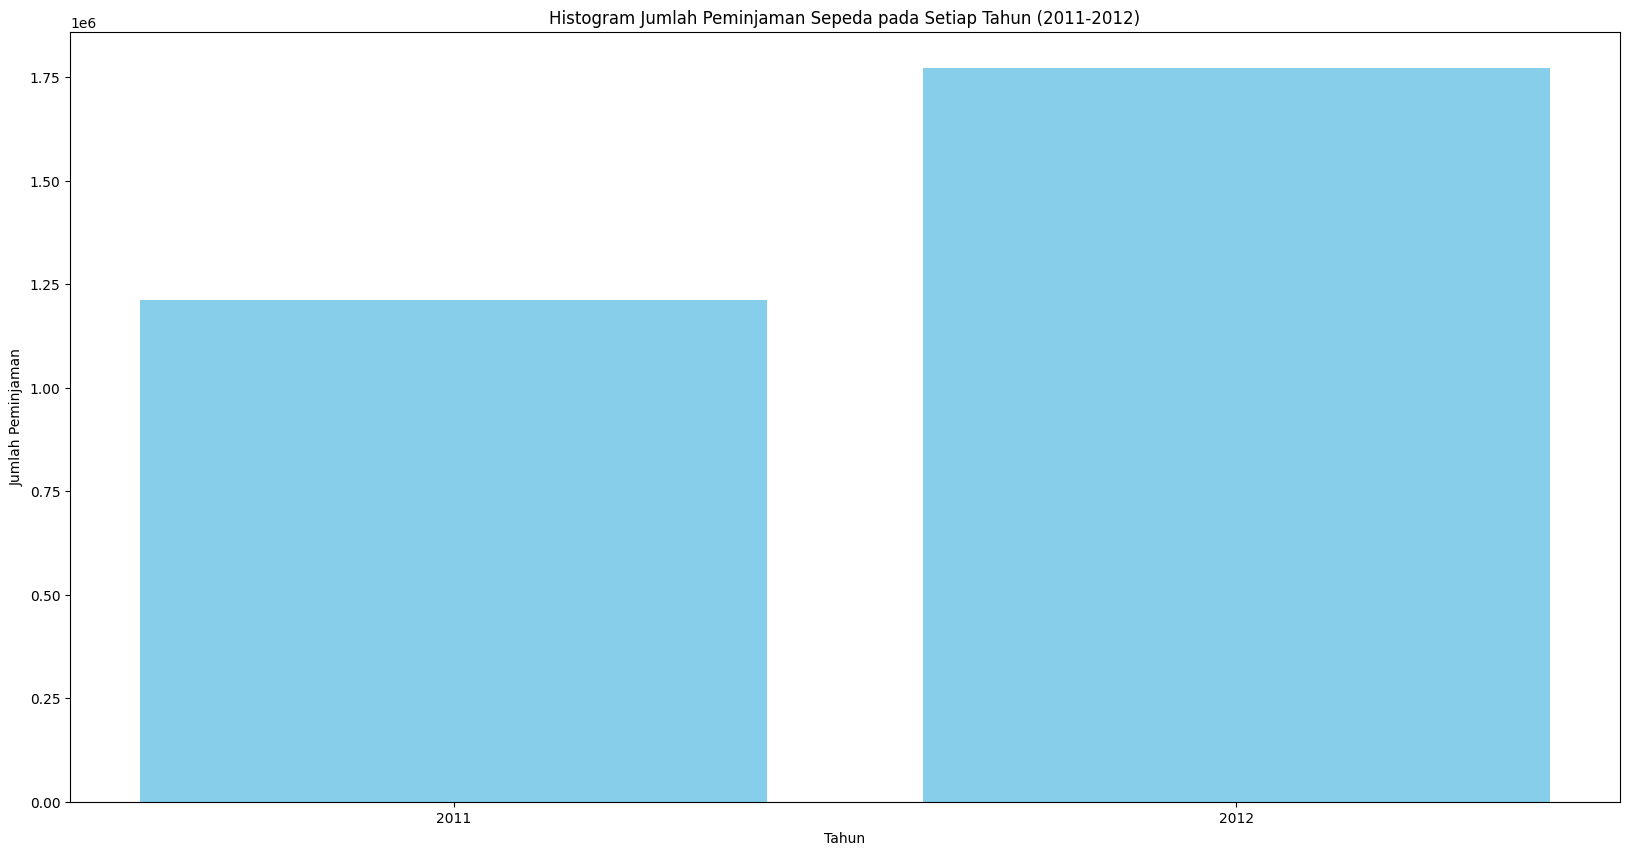

In [175]:
import matplotlib.pyplot as plt

# Data jumlah peminjaman sepeda pada tiap tahun
total_tahunan = day_df.groupby('yr')['cnt'].sum()

# Membuat mapping dari angka ke tahun
mapping_thn = {0: '2011', 1: '2012'}

# Mengganti nama indeks dengan menggunakan mapping
total_tahunan = total_tahunan.rename(index=mapping_thn)

# Membuat histogram menggunakan matplotlib
plt.figure(figsize=(20, 10))
plt.bar(total_tahunan.index, total_tahunan.values, color='skyblue')
plt.title('Histogram Jumlah Peminjaman Sepeda pada Setiap Tahun (2011-2012)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peminjaman')
plt.show()



Dari tabel diatas menunjukkan bahwa tahun 2012 mengalami peningkatan peminjaman yang signifikan

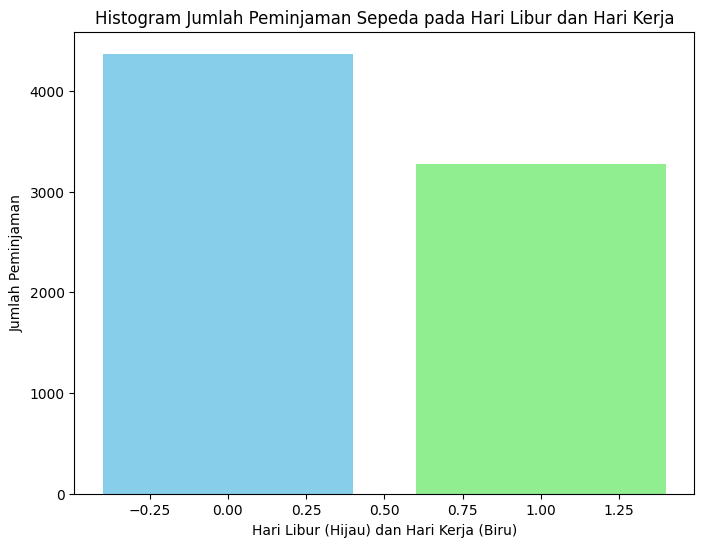

In [176]:
import matplotlib.pyplot as plt

# Menghitung jumlah peminjaman sepeda untuk setiap kategori 'holiday'
total_peminjaman_per_holiday = day_df.groupby('holiday')['cnt'].mean()

# Membuat histogram menggunakan matplotlib
plt.figure(figsize=(8, 6))
plt.bar(total_peminjaman_per_holiday.index, total_peminjaman_per_holiday.values, color=['skyblue', 'lightgreen'])
plt.title('Histogram Jumlah Peminjaman Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Hari Libur (Hijau) dan Hari Kerja (Biru)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


Tabel diatas merupakan perbandingan peminjaman pada hari libur dan kerja yang sudah diratakan. Dapat dilihat bahwa hari kerja adalah hari yang rentan peminjaman

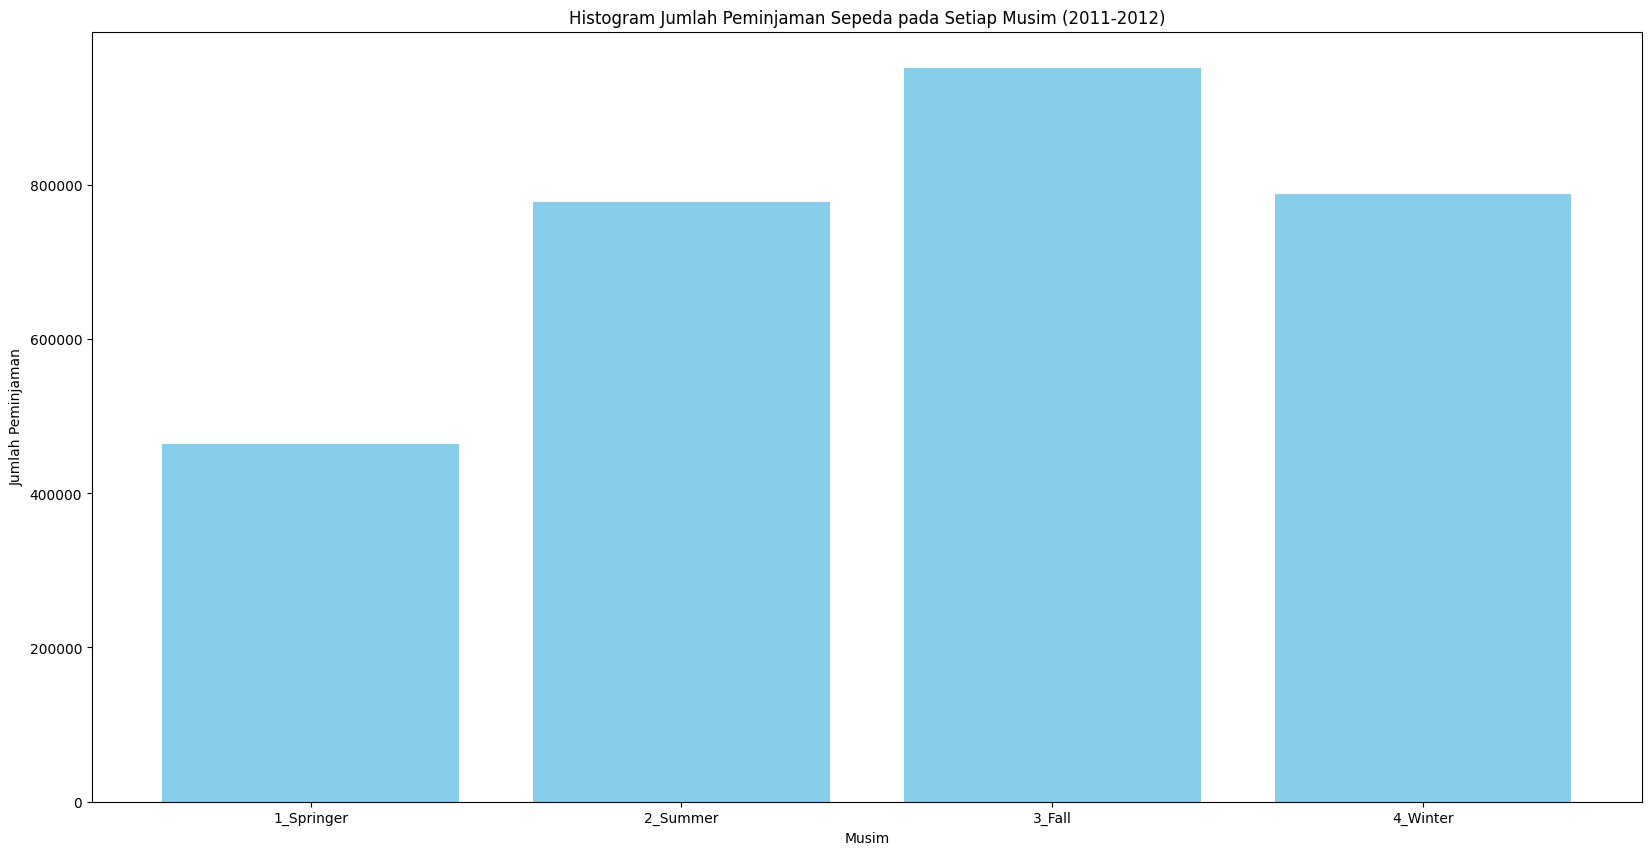

In [177]:
import matplotlib.pyplot as plt

# Data jumlah peminjaman sepeda pada tiap tahun
total_musim = day_df.groupby('season')['cnt'].sum()

# Membuat mapping dari angka ke tahun
mapping_musim = {1: '1_Springer', 2: '2_Summer', 3: '3_Fall', 4: '4_Winter'}

# Mengganti nama indeks dengan menggunakan mapping
total_musim = total_musim.rename(index=mapping_musim)

# Membuat histogram menggunakan matplotlib
plt.figure(figsize=(20, 10))
plt.bar(total_musim.index, total_musim.values, color='skyblue')
plt.title('Histogram Jumlah Peminjaman Sepeda pada Setiap Musim (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()



Pada tabel diatas menunjukkan bahwa musim gugur adalah musim paling banyak peminjaman sepeda

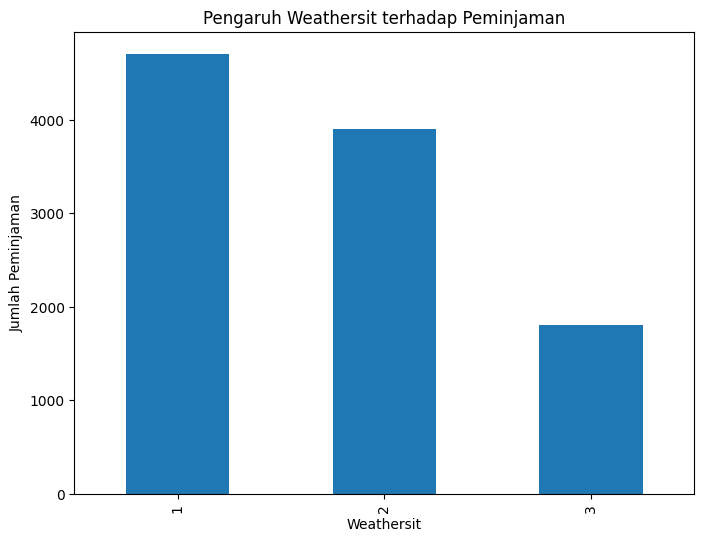

In [178]:
# Visualisasi pengaruh Weathersit
day_df.groupby('weathersit')['cnt'].mean().sort_index().plot(kind='bar', figsize=(8, 6), title='Pengaruh Weathersit terhadap Peminjaman')
plt.xlabel('Weathersit')
plt.ylabel('Jumlah Peminjaman')
plt.show()


Tabel diatas menunjukkan bahwa udara yang paling disukai pelanggan untuk meminjam sepeda yaitu udara yang paling baik dan normal dimana 1 menunjukkan bahwa udara terang dan sedikit berawan

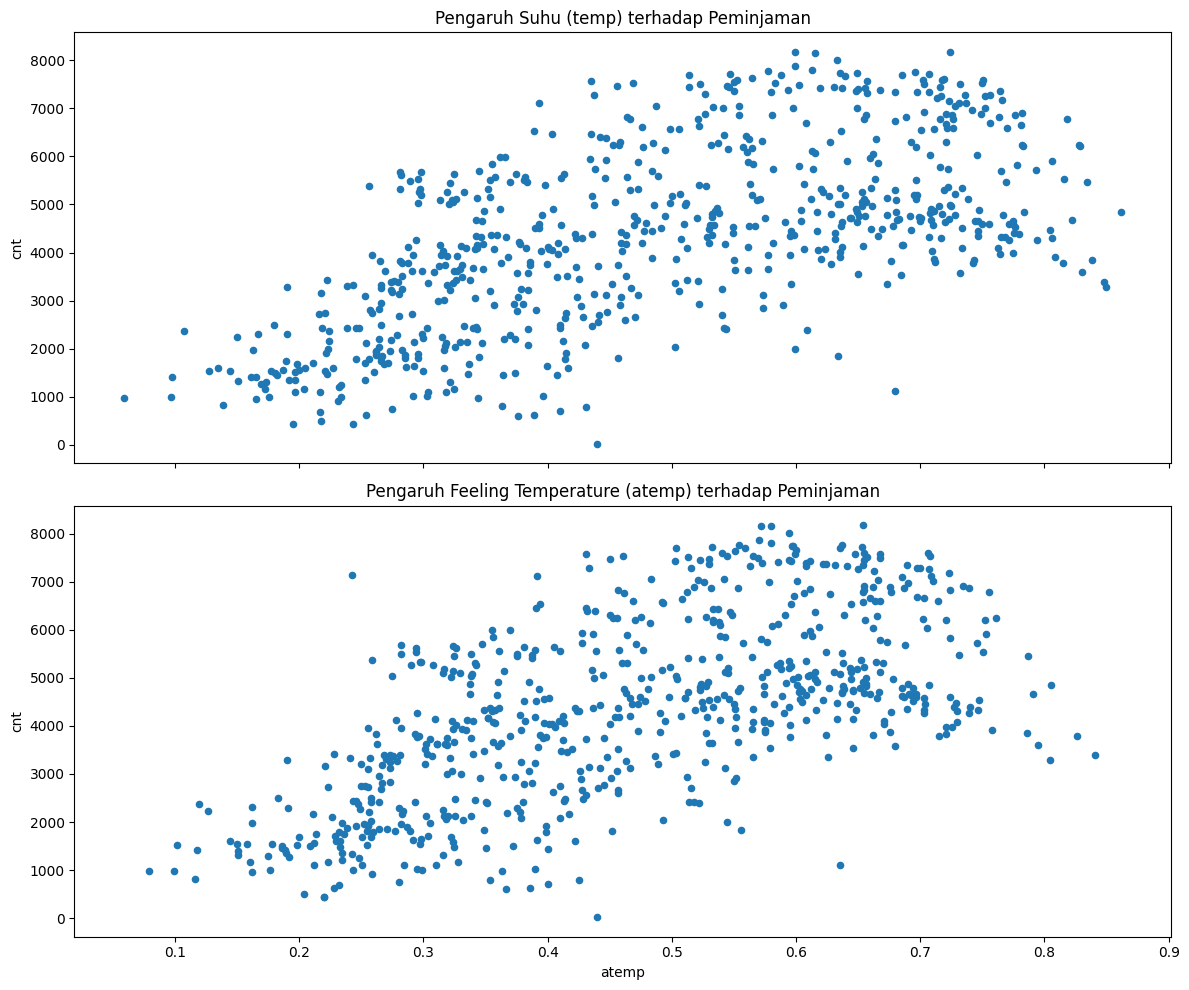

In [179]:
# Visualisasi pengaruh suhu terhadap peminjaman
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
day_df.plot(x='temp', y='cnt', kind='scatter', ax=axes[0], title='Pengaruh Suhu (temp) terhadap Peminjaman')
day_df.plot(x='atemp', y='cnt', kind='scatter', ax=axes[1], title='Pengaruh Feeling Temperature (atemp) terhadap Peminjaman')

plt.tight_layout()
plt.show()


Jika dilihat seksama, scatter plot diatas menunjukkan hubungan linear naik antara peningkatan suhu dengan banyak peminjaman sepeda

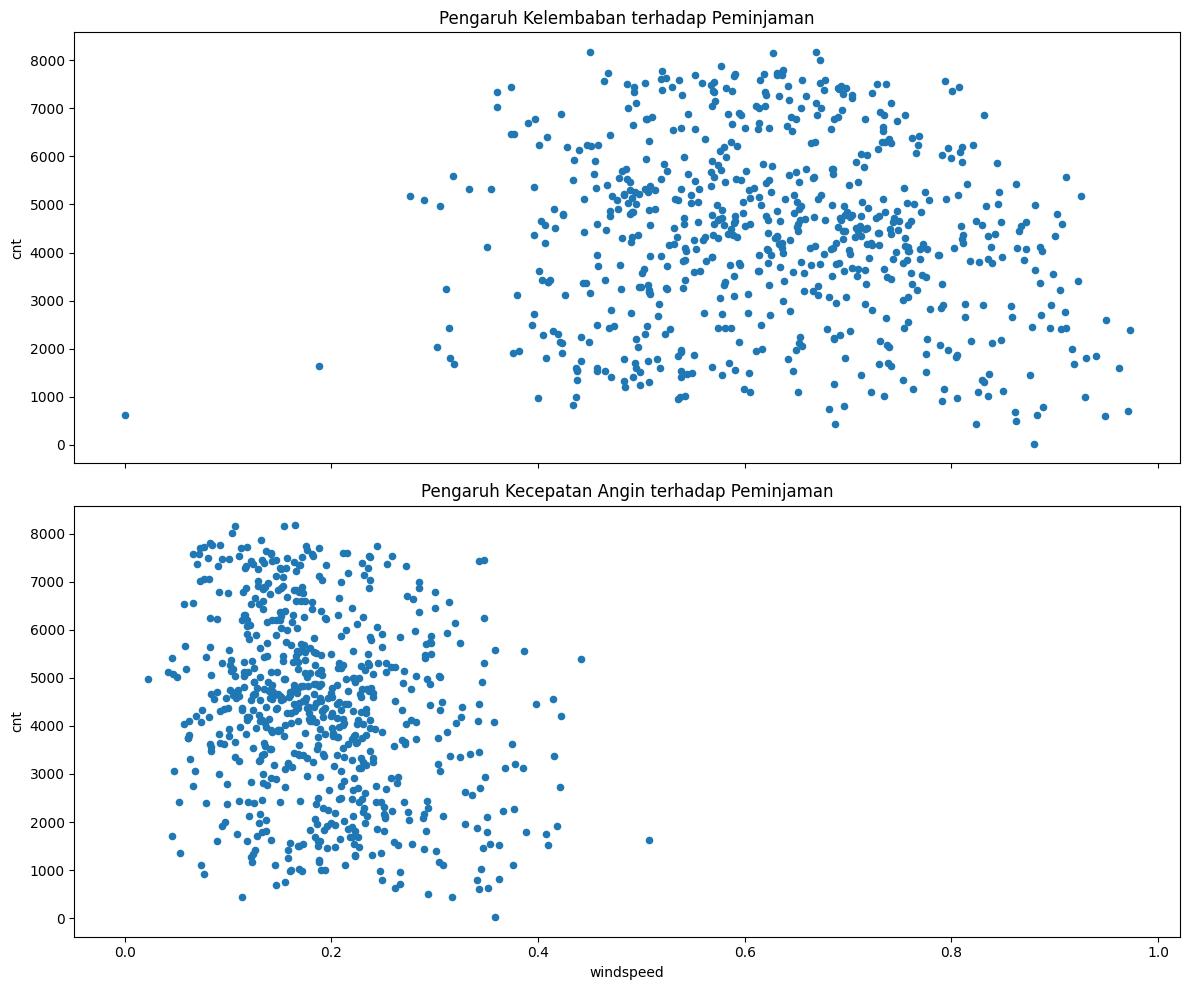

In [180]:
# Visualisasi pengaruh kelembaban dan kecepatan angin terhadap peminjaman
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
day_df.plot(x='hum', y='cnt', kind='scatter', ax=axes[0], title='Pengaruh Kelembaban terhadap Peminjaman')
day_df.plot(x='windspeed', y='cnt', kind='scatter', ax=axes[1], title='Pengaruh Kecepatan Angin terhadap Peminjaman')

plt.tight_layout()
plt.show()


Dari scatter plot diatas menunjukkan bahwa terdapat hubungan linear menurun antara peningkatan kecepatan angin dan kelembaban dengan peminjaman

### Pertanyaan 2:
Apakah terdapat perbedaan pola peminjaman antara pengguna casual dan pengguna terdaftar?

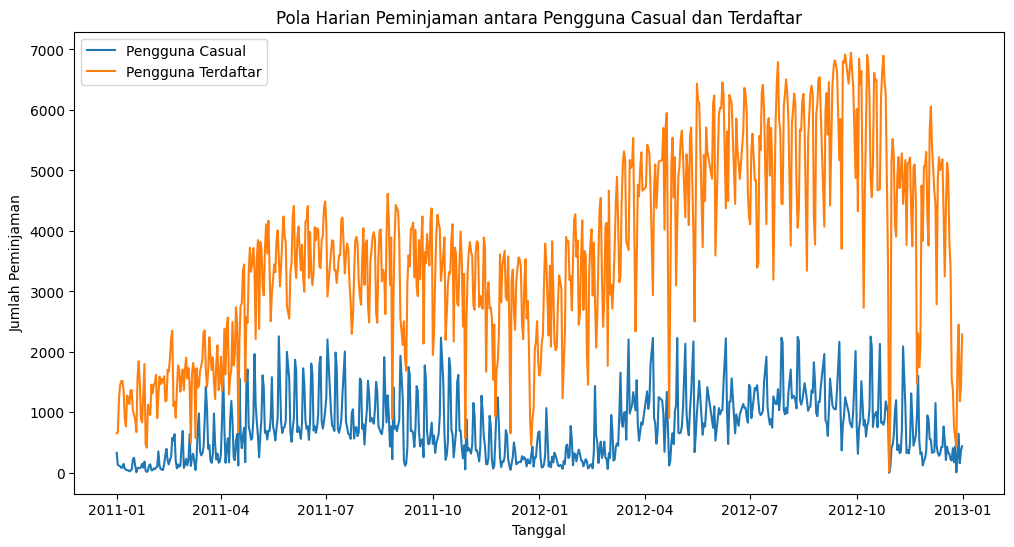

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
# Membuat mapping dari angka ke nama hari
mapping_hari = {0: '0_Minggu', 1: '1_Senin', 2: '2_Selasa', 3: '3_Rabu', 4: '4_Kamis', 5: '5_Jumat', 6: '6_Sabtu'}

# Visualisasi pola harian untuk setiap jenis pengguna
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='casual', data=day_df, label='Pengguna Casual')
sns.lineplot(x='dteday', y='registered', data=day_df, label='Pengguna Terdaftar')
plt.title('Pola Harian Peminjaman antara Pengguna Casual dan Terdaftar')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()


Pada tabel diatas menunjukkan bahwa banyak pengguna yang terdaftar (registered) jauh lebih banyak dibanding pengguna umum (casual). Selain itu, pergerakan tren dari 2 parameter tersebut sedikit identik

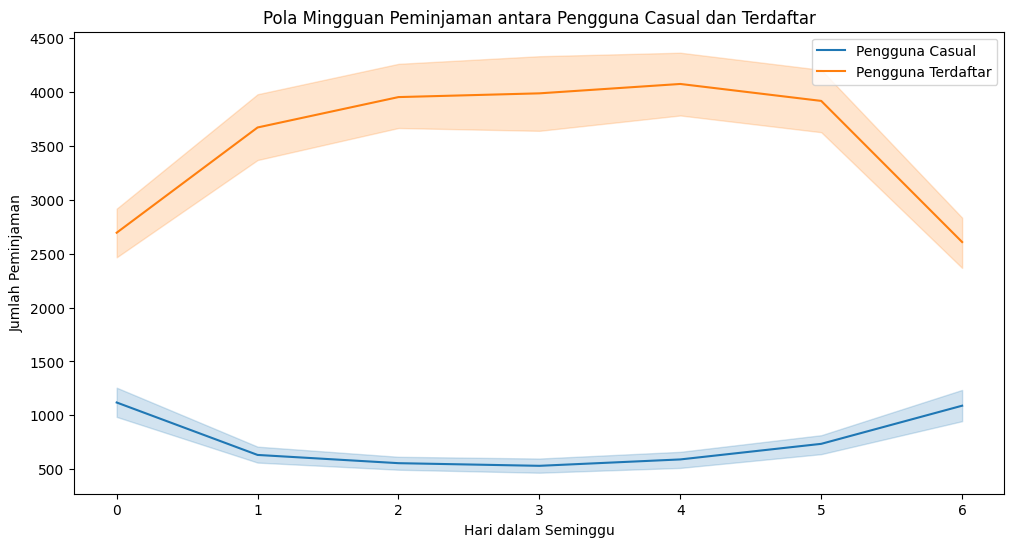

In [182]:
# Visualisasi pola mingguan untuk setiap jenis pengguna

plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday', y='casual', data=day_df, label='Pengguna Casual')
sns.lineplot(x='weekday', y='registered', data=day_df, label='Pengguna Terdaftar')
plt.title('Pola Mingguan Peminjaman antara Pengguna Casual dan Terdaftar')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()


Pada tabel diatas, kita menemukan bahwa pengguna terdaftar (registered) lebih banyak pada hari kerja dalam satu minggu sedangkan pengguna umum meningkat apabila hari libur

In [183]:
from scipy.stats import ttest_ind

# Memisahkan data untuk pengguna casual dan terdaftar
peminjaman_casual = day_df['casual']
peminjaman_registered = day_df['registered']

# Melakukan uji t
statistik_t, nilai_p = ttest_ind(peminjaman_casual, peminjaman_registered)

# Menampilkan hasil uji t
print("Statistik t:", statistik_t)
print("Nilai p:", nilai_p)

# Menginterpretasikan hasil
alpha = 0.05
if nilai_p < alpha:
    print("Terdapat perbedaan signifikan antara pengguna casual dan terdaftar.")
else:
    print("Tidak terdapat perbedaan signifikan antara pengguna casual dan terdaftar.")


Statistik t: -45.30911176368738
Nilai p: 7.929002810496177e-275
Terdapat perbedaan signifikan antara pengguna casual dan terdaftar.


Uji T diatas juga membuktikan bahwa terdapat perbedaan signifikan antara pengguna casual dan registered

## Conclusion

**Kesimpulan**



1.   Dari beberapa penjelasan pada alur sebelumnya, kita mendapatkan kesimpulan yaitu peminjaman sepeda rentan banyak pada hari kerja (Senin - Jumat) terutama pada hari dengan cuaca yang bagus dimana cuaca tersebut menunjukkan langit yang cerah, sedikit berawan,  suhu yang tinggi, dan kecil rasio hujan. Ini terbuktikan dari peningkatan yang signifikan pada pertengahan tahun mendekati musim gugur dimana suhu bumi meningkat dan cuaca rentan hujan

2.   Dari analisis yang sudah dilakukan, dapat ditemukan perbedaan perilaku yang signifikan antara peminjam registered dan casual diantaranya,
- Peminjam lebih banyak yang sudah *registered* dibanding *casual* dan perbedaan (margin) yang signifikan. Ini menunjukkan bahwa terdapat benefit untuk pengguna yang sudah terdaftar dalam meminjam sepeda.

- Pengguna terdaftar (registered) lebih banyak pada hari kerja dalam satu minggu sedangkan pengguna umum meningkat apabila hari libur.

- Kemungkinan besar peminjam yang *registered* ialah masyarakat yang bekerja sedangkan *casual* ialah turis karena alasan-alasan di atas.
